In [1]:
# Install the Earth Engine API library
!pip install earthengine-api

# Import necessary libraries
import ee
import geemap

# Authenticate Earth Engine account
ee.Authenticate()

# Initialize Earth Engine
ee.Initialize()

# Define the region of interest (ROI) as a polygon
roi = ee.Geometry.Polygon(
        [[[-110.3, 38.7],
          [-110.3, 38.6],
          [-110.2, 38.6],
          [-110.2, 38.7]]])

# Define the time period of interest
start_date = '2022-01-01'
end_date = '2022-12-31'

# Define Landsat image collection and filter by region and time
landsat_collection = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
                        .filterBounds(roi) \
                        .filterDate(start_date, end_date)

# Select the bands of interest
landsat_bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7']

# Retrieve the first image in the collection
landsat_image = landsat_collection.first()

# Use geemap to display the image on the map
Map = geemap.Map()
Map.centerObject(roi, 10)
Map.addLayer(landsat_image, {'bands': landsat_bands, 'min': 0, 'max': 3000}, 'Landsat Image')
Map.addLayer(roi, {}, 'ROI')
Map

# Export the image to Google Drive
task = ee.batch.Export.image.toDrive(image=landsat_image,
                                     description='Landsat_Image',
                                     folder='Landsat_Data',
                                     region=roi,
                                     scale=30)
task.start()


EEException: ee.Initialize: no project found. Call with project= or see http://goo.gle/ee-auth.

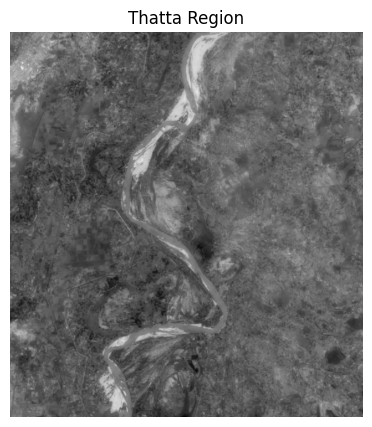

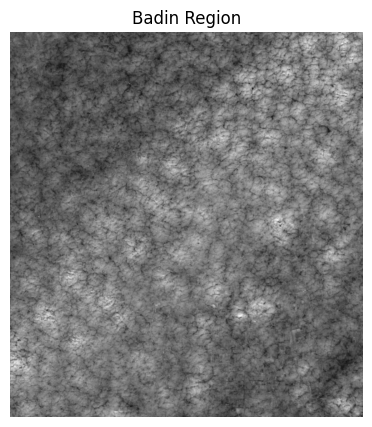

In [10]:
# Convert Earth Engine images to NumPy arrays
array_thatta = geemap.ee_to_numpy(image_thatta, region=thatta)
array_badin = geemap.ee_to_numpy(image_badin, region=badin)

# Select the red band (band index 2) for visualization
red_band_thatta = array_thatta[:, :, 2]
red_band_badin = array_badin[:, :, 2]

# Plot Thatta image
plt.figure(figsize=(10, 5))
plt.imshow(red_band_thatta, cmap='gray')  # Display in grayscale
plt.title('Thatta Region')
plt.axis('off')
plt.show()

# Plot Badin image
plt.figure(figsize=(10, 5))
plt.imshow(red_band_badin, cmap='gray')  # Display in grayscale
plt.title('Badin Region')
plt.axis('off')
plt.show()


In [13]:
# Select NIR and red bands from the image collections
nir_thatta = image_thatta.select('SR_B5')  # Landsat NIR band
red_thatta = image_thatta.select('SR_B4')  # Landsat red band

nir_badin = image_badin.select('SR_B5')  # Landsat NIR band
red_badin = image_badin.select('SR_B4')  # Landsat red band

# Calculate NDVI for Thatta region
ndvi_thatta = nir_thatta.subtract(red_thatta).divide(nir_thatta.add(red_thatta))

# Calculate NDVI for Badin region
ndvi_badin = nir_badin.subtract(red_badin).divide(nir_badin.add(red_badin))

# Display NDVI values
print("NDVI values for Thatta region:")
print(ndvi_thatta.getInfo())

print("\nNDVI values for Badin region:")
print(ndvi_badin.getInfo())


NDVI values for Thatta region:
{'type': 'Image', 'bands': [{'id': 'SR_B5', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7681, 7831], 'crs': 'EPSG:32642', 'crs_transform': [30, 0, 240585, 0, -30, 2833215]}]}

NDVI values for Badin region:
{'type': 'Image', 'bands': [{'id': 'SR_B5', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7621, 7771], 'crs': 'EPSG:32642', 'crs_transform': [30, 0, 398985, 0, -30, 2831415]}]}


In [17]:
# Define function to calculate NDVI
def calculate_ndvi(image):
    nir = image.select('SR_B5')  # Landsat NIR band
    red = image.select('SR_B4')  # Landsat red band
    ndvi = nir.subtract(red).divide(nir.add(red))
    return ndvi

# Define function to calculate SAVI
def calculate_savi(image):
    nir = image.select('SR_B5')  # Landsat NIR band
    red = image.select('SR_B4')  # Landsat red band
    savi = nir.subtract(red).divide(nir.add(red).add(0.5)).multiply(1.5)
    return savi

# Define function to calculate Albedo
def calculate_albedo(image):
    albedo = image.select('SR_B1')  # Landsat coastal aerosol band
    return albedo

# Define function to calculate TGSI
def calculate_tgsi(image):
    green = image.select('SR_B3')  # Landsat green band
    nir = image.select('SR_B5')  # Landsat NIR band
    tgsi = nir.subtract(green).divide(nir.add(green))
    return tgsi

# Define function to calculate LST
def calculate_lst(image):
    lst = image.select('ST_B10')  # Landsat thermal band 10
    return lst

# Define function to calculate BSI
def calculate_bsi(image):
    swir = image.select('SR_B6')  # Landsat SWIR band
    nir = image.select('SR_B5')  # Landsat NIR band
    bsi = swir.subtract(nir).divide(swir.add(nir))
    return bsi

# Calculate indices for Thatta and Badin regions
ndvi_thatta = calculate_ndvi(image_thatta)
savi_thatta = calculate_savi(image_thatta)
albedo_thatta = calculate_albedo(image_thatta)
tgsi_thatta = calculate_tgsi(image_thatta)
lst_thatta = calculate_lst(image_thatta)
bsi_thatta = calculate_bsi(image_thatta)

ndvi_badin = calculate_ndvi(image_badin)
savi_badin = calculate_savi(image_badin)
albedo_badin = calculate_albedo(image_badin)
tgsi_badin = calculate_tgsi(image_badin)
lst_badin = calculate_lst(image_badin)
bsi_badin = calculate_bsi(image_badin)

# Display indices for Thatta region
print("Indices for Thatta region:")
print("NDVI:", ndvi_thatta.getInfo())
print("SAVI:", savi_thatta.getInfo())
print("Albedo:", albedo_thatta.getInfo())
print("TGSI:", tgsi_thatta.getInfo())
print("LST:", lst_thatta.getInfo())
print("BSI:", bsi_thatta.getInfo())

# Display indices for Badin region
print("\nIndices for Badin region:")
print("NDVI:", ndvi_badin.getInfo())
print("SAVI:", savi_badin.getInfo())
print("Albedo:", albedo_badin.getInfo())
print("TGSI:", tgsi_badin.getInfo())
print("LST:", lst_badin.getInfo())
print("BSI:", bsi_badin.getInfo())


Indices for Thatta region:
NDVI: {'type': 'Image', 'bands': [{'id': 'SR_B5', 'data_type': {'type': 'PixelType', 'precision': 'float'}, 'dimensions': [7681, 7831], 'crs': 'EPSG:32642', 'crs_transform': [30, 0, 240585, 0, -30, 2833215]}]}
SAVI: {'type': 'Image', 'bands': [{'id': 'SR_B5', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -196605, 'max': 196605}, 'dimensions': [7681, 7831], 'crs': 'EPSG:32642', 'crs_transform': [30, 0, 240585, 0, -30, 2833215]}]}
Albedo: {'type': 'Image', 'bands': [{'id': 'SR_B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [7681, 7831], 'crs': 'EPSG:32642', 'crs_transform': [30, 0, 240585, 0, -30, 2833215]}], 'version': 1629836317281779, 'id': 'LANDSAT/LC08/C02/T1_L2/LC08_152043_20210105', 'properties': {'DATA_SOURCE_ELEVATION': 'GLS2000', 'WRS_TYPE': 2, 'REFLECTANCE_ADD_BAND_1': -0.2, 'REFLECTANCE_ADD_BAND_2': -0.2, 'DATUM': 'WGS84', 'REFLECTANCE_ADD_BAND_3': -0.2, 'REFLECTANCE_ADD_BAND_4':

In [21]:
import ee

# Initialize Earth Engine
ee.Initialize()

# Define the regions of interest (Thatta and Badin)
thatta_region = ee.Geometry.Rectangle([67.6211, 24.8307, 67.9789, 24.5005])
badin_region = ee.Geometry.Rectangle([68.3801, 25.0968, 68.6595, 24.7822])

# Print the regions
print('Thatta Region:', thatta_region.getInfo())
print('Badin Region:', badin_region.getInfo())


Thatta Region: {'type': 'Polygon', 'coordinates': [[[67.6211, 24.5005], [67.9789, 24.5005], [67.9789, 24.8307], [67.6211, 24.8307], [67.6211, 24.5005]]]}
Badin Region: {'type': 'Polygon', 'coordinates': [[[68.3801, 24.7822], [68.6595, 24.7822], [68.6595, 25.0968], [68.3801, 25.0968], [68.3801, 24.7822]]]}


In [23]:
import ee
import geemap
import matplotlib.pyplot as plt

# Initialize Earth Engine
ee.Initialize()

# Define the regions of interest (Thatta and Badin)
thatta_region = ee.Geometry.Polygon(
    [[[67.6211, 24.5005], [67.9789, 24.5005], [67.9789, 24.8307], [67.6211, 24.8307], [67.6211, 24.5005]]]
)
badin_region = ee.Geometry.Polygon(
    [[[68.3801, 24.7822], [68.6595, 24.7822], [68.6595, 25.0968], [68.3801, 25.0968], [68.3801, 24.7822]]]
)

# Landsat imagery collection
collection = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')

# Filter imagery for the specified time range
start_date = '2014-01-01'
end_date = '2024-12-31'
filtered = collection.filterDate(start_date, end_date)

# Select bands for NDVI calculation
def addNDVI(image):
    return image.addBands(image.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI'))

# Map NDVI over the collection
ndvi_collection = filtered.map(addNDVI)

# Get the number of images in the collection
count = ndvi_collection.size().getInfo()

# Plot NDVI time series for Thatta
plt.figure(figsize=(14, 7))
for i in range(count):
    image = ee.Image(ndvi_collection.toList(count).get(i))
    ndvi = image.select('NDVI')
    data = geemap.ee_to_numpy(ndvi, region=thatta_region)
    plt.plot(data, label=str(i+2014))

plt.title('NDVI Time Series for Thatta')
plt.xlabel('Year')
plt.ylabel('NDVI Value')
plt.legend()
plt.show()

# Plot NDVI time series for Badin
plt.figure(figsize=(14, 7))
for i in range(count):
    image = ee.Image(ndvi_collection.toList(count).get(i))
    ndvi = image.select('NDVI')
    data = geemap.ee_to_numpy(ndvi, region=badin_region)
    plt.plot(data, label=str(i+2014))

plt.title('NDVI Time Series for Badin')
plt.xlabel('Year')
plt.ylabel('NDVI Value')
plt.legend()
plt.show()


Exception: User memory limit exceeded.

<Figure size 1400x700 with 0 Axes>

EEException: User memory limit exceeded.

In [ ]:
import ee
import geemap
import matplotlib.pyplot as plt

# Initialize Earth Engine
ee.Initialize()

# Define the Landsat image collection
collection_id = 'LANDSAT/LC08/C02/T1_L2'
collection = ee.ImageCollection(collection_id)

# Select a specific image from the collection (change the index as needed)
image_index = 0
image = ee.Image(collection.toList(collection.size()).get(image_index))

# Get the image acquisition date
date = ee.Date(image.get('system:time_start')).format('YYYY-MM-dd').getInfo()

# Get the region of interest (if needed)
# roi = ee.Geometry.Point(x, y).buffer(distance)

# Plot the image
try:
    geemap.show(image)
except Exception as e:
    print("Error plotting image:", e)

# Export the image (optional)
geemap.ee_export_image(image, filename=f"Landsat_image_{date}", scale=30)

# Show the image using matplotlib (optional)
try:
    data = geemap.ee_to_numpy(image)
    plt.imshow(data)
    plt.title(f'Landsat Image ({date})')
    plt.axis('off')
    plt.show()
except Exception as e:
    print("Error plotting image using matplotlib:", e)


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, LayerNormalization, Layer, MaxPooling2D, Reshape, Dense, Flatten, Dropout
from tensorflow.keras import backend as K

# Define the Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, kernel_size=(9, 9), strides=(2, 2), padding='valid', **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding

    def build(self, input_shape):
        _, input_num_capsule, input_dim_capsule, input_num_channels = input_shape
        self.input_num_capsule = input_num_capsule
        self.input_dim_capsule = input_dim_capsule

        self.kernel = self.add_weight(
            shape=self.kernel_size + (input_dim_capsule, self.num_capsule * self.dim_capsule),
            initializer='glorot_uniform',
            name='kernel')

    def call(self, inputs, training=None):
        input_shape = K.shape(inputs)
        _, input_num_capsule, input_dim_capsule, input_num_channels = input_shape

        inputs_expand = K.expand_dims(inputs, 3)

        inputs_tiled = K.tile(inputs_expand, [1, 1, 1, self.num_capsule, 1])

        inputs_hat = K.map_fn(lambda x: K.conv2d(x, self.kernel, strides=self.strides, padding=self.padding),
                               elems=inputs_tiled)

        inputs_hat = K.reshape(inputs_hat, (-1, input_num_capsule, self.num_capsule * self.dim_capsule))

        b = tf.zeros(shape=[K.shape(inputs_hat)[0], input_num_capsule, self.num_capsule])

        assert self.routings > 0, 'The routings should be > 0.'
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            o = tf.einsum('bij,bijk->bik', c, inputs_hat)
            if i < self.routings - 1:
                o = tf.keras.activations.relu(o)
                b += tf.einsum('bik,bijk->bij', o, inputs_hat)
        return o

    def compute_output_shape(self, input_shape):
        return None, self.num_capsule, self.dim_capsule


# Define the Swin Transformer Capsule Net model
def create_swin_transformer_capsule_net(input_shape, num_classes):
    model = models.Sequential()

    # Swin Transformer layers
    # Add Swin Transformer layers here

    # Capsule layer
    model.add(CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3, name='capsule_layer'))

    # Flatten Capsule outputs
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model


# Create the model
input_shape = (28, 28, 3)  # Adjust input shape as per your data
num_classes = 2  # Adjust number of output classes
model = create_swin_transformer_capsule_net(input_shape, num_classes)

# Print model summary
model.summary()


In [27]:
!pip install geopandas
!pip install shapely

import geopandas as gpd
from shapely.geometry import Point, Polygon

# Now you can work with geospatial data using GeoPandas and Shapely


In [ ]:
# Upload shapefiles or geojson files to Google Colab

# Read Thatta and Badin shapefiles using GeoPandas
thatta_shapefile_path = '/path/to/thatta_shapefile.shp'
badin_shapefile_path = '/path/to/badin_shapefile.shp'

thatta_gdf = gpd.read_file(thatta_shapefile_path)
badin_gdf = gpd.read_file(badin_shapefile_path)

# Plot Thatta and Badin regions
ax = thatta_gdf.plot(color='blue', edgecolor='black')
badin_gdf.plot(ax=ax, color='red', edgecolor='black')

# Show the plot
plt.show()
